In [1]:
'''This program uses an artificial neural network called Long SHort Term Memory (LSTM)
to predict the closing stock price of a corporation (Apple Inc.) using the past 100 day stock price.'''

import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = yf.download('AAPL',start='2012-01-03',end='2023-05-12')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482926,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550010,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821990,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801652,394024400
...,...,...,...,...,...,...
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.330261,113316400
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.260345,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.532745,45326900


In [3]:
df.shape

(2858, 6)

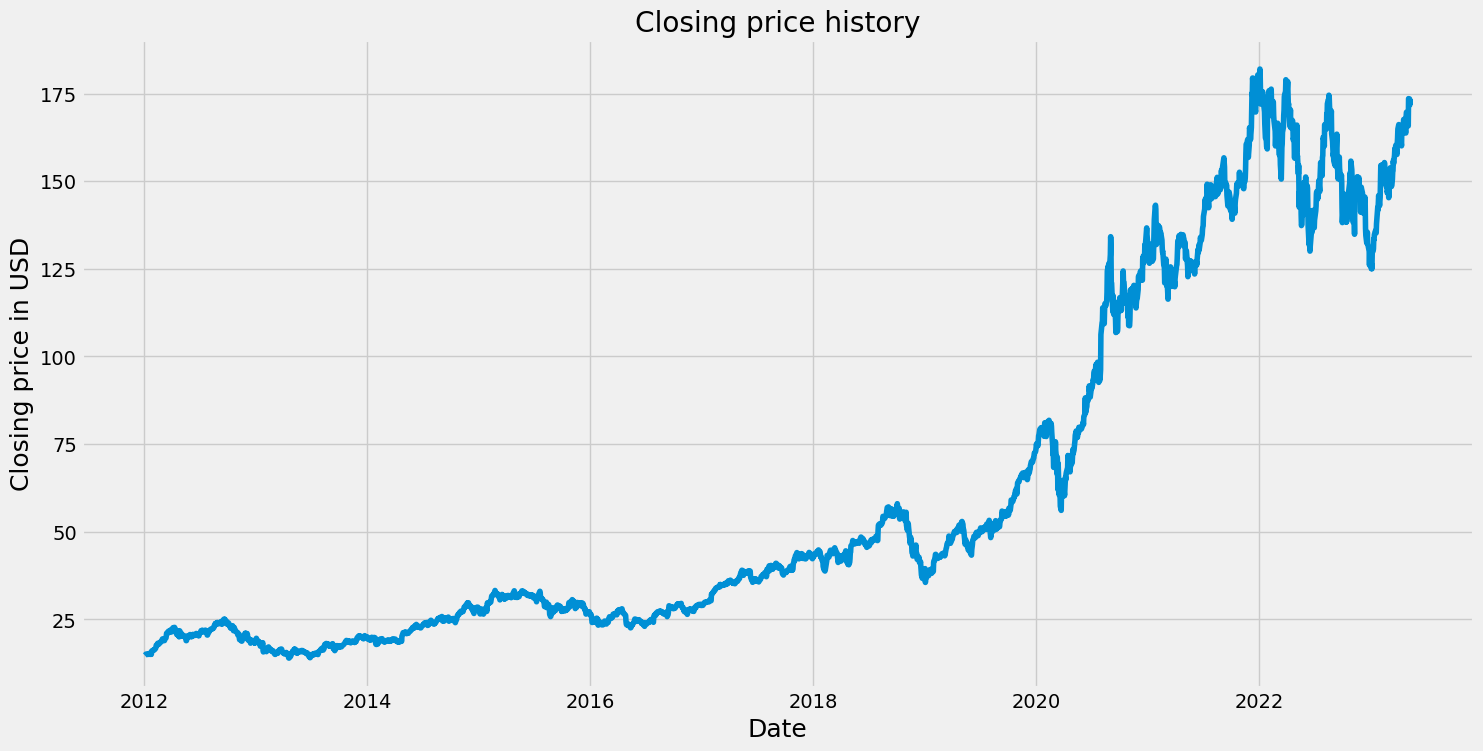

In [4]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price in USD',fontsize=18)
plt.show()

In [5]:
#create a new dataframe with only the 'close' column
data = df.filter(['Close'])
#converting to numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2287

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.93907034],
       [0.9497211 ],
       [0.95085165]])

In [7]:
#Create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train datasets
x_train=[]
y_train=[]
for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])
    if i<=101:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798,
       0.04660893, 0.044418  , 0.04847262, 0.0507443 , 0.04967965,
       0.05167084, 0.05221272, 0.0505573 , 0.05008129, 0.04935238,
       0.04562503, 0.04029114, 0.04657493, 0.04628593, 0.0418

In [8]:
#convert x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2187, 100, 1)

In [10]:
#build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2187/2187 [==============================] - 155s 68ms/step - loss: 7.6398e-04


In [13]:
#Create the testing dataset
#Create a new array containing scaled values from index 2187 to 2858
test_data = scaled_data[training_data_len-100:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])

In [14]:
#converting the data to numpy array
x_test = np.array(x_test)

In [15]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [16]:
#Get the models predicted price values
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

18/18 [==============================] - 2s 43ms/step


In [17]:
#getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(prediction-y_test)**2)
rmse

6.662276673859765

C:\Users\Admin\AppData\Local\Temp\ipykernel_7012\2520235928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


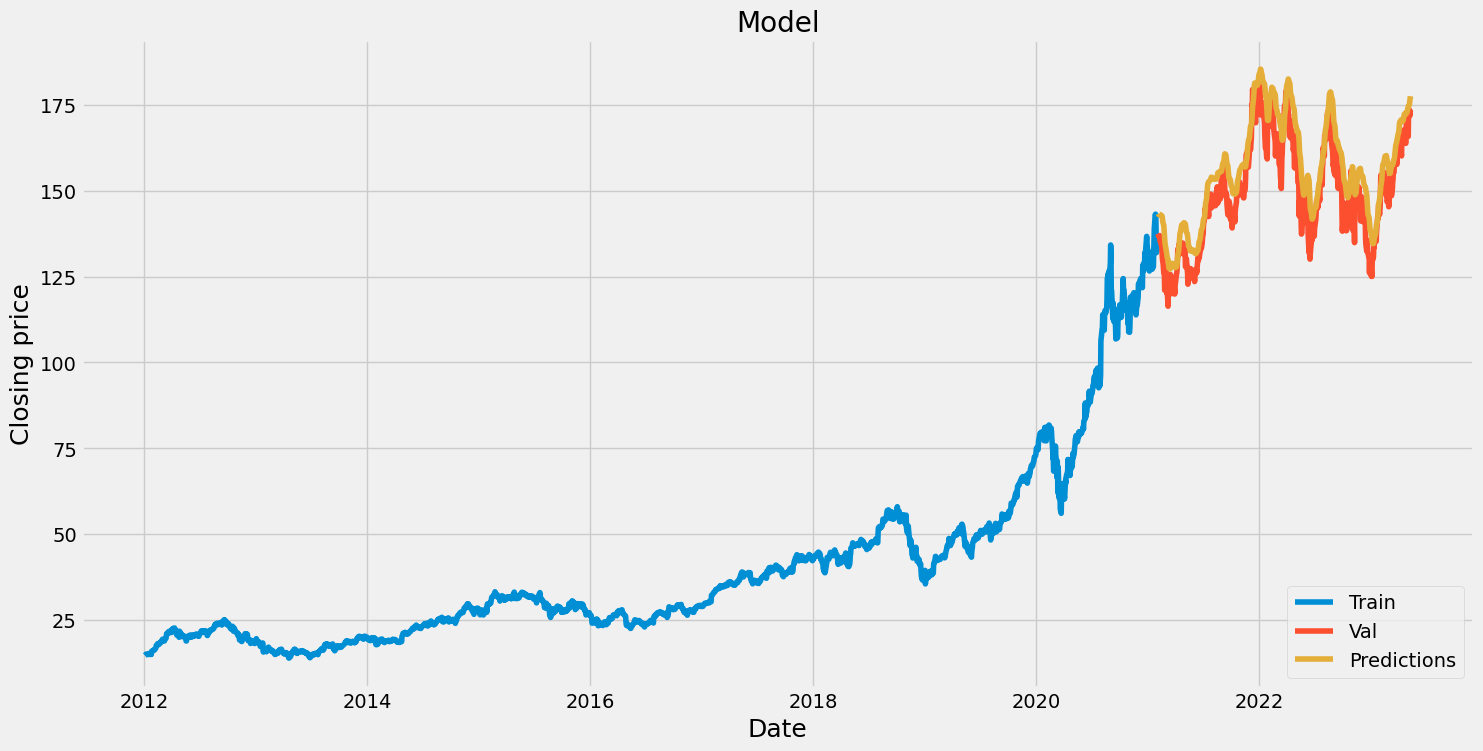

In [18]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = prediction
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [19]:
#Show the Actual and predicted price
valid

,Close,Predictions
Date,,
2021-02-04,137.389999,143.267197
2021-02-05,136.759995,143.075974
2021-02-08,136.910004,143.013382
2021-02-09,136.009995,143.051178
2021-02-10,135.389999,143.047104
...,...,...
2023-05-05,173.570007,174.498993
2023-05-08,173.500000,175.143829
2023-05-09,171.770004,175.997650


In [20]:
#get the quote
apple_quote = yf.download('AAPL',start='2012-01-03',end='2023-05-12')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 100 day closing price values and convert the dataframe to an array
last_100_days = new_df[-100:].values
#scale the data to be values between 0 and 1
last_100_days_scaled = scaler.transform(last_100_days)
#create an empty list
X_test = []
#append last 100 days 
X_test.append(last_100_days_scaled)
#convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 67ms/step
[[178.20944]]
